In [19]:
import pandas as pd
data = pd.read_csv("IRIS.csv")
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

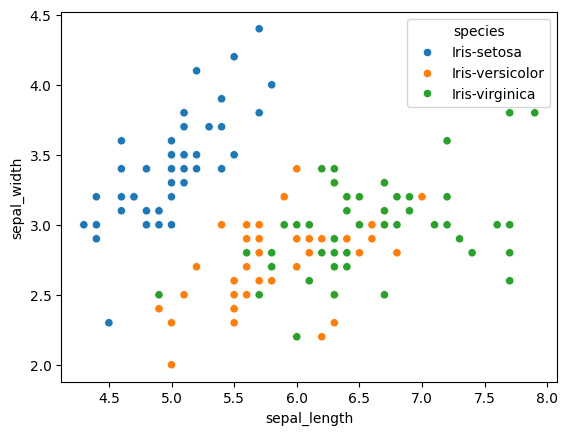

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data)

In [21]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [22]:
data['species'] = data['species'].astype('category').cat.codes
print(data.head(25))

    sepal_length  sepal_width  petal_length  petal_width  species
0            5.1          3.5           1.4          0.2        0
1            4.9          3.0           1.4          0.2        0
2            4.7          3.2           1.3          0.2        0
3            4.6          3.1           1.5          0.2        0
4            5.0          3.6           1.4          0.2        0
5            5.4          3.9           1.7          0.4        0
6            4.6          3.4           1.4          0.3        0
7            5.0          3.4           1.5          0.2        0
8            4.4          2.9           1.4          0.2        0
9            4.9          3.1           1.5          0.1        0
10           5.4          3.7           1.5          0.2        0
11           4.8          3.4           1.6          0.2        0
12           4.8          3.0           1.4          0.1        0
13           4.3          3.0           1.1          0.1        0
14        

In [23]:
x = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


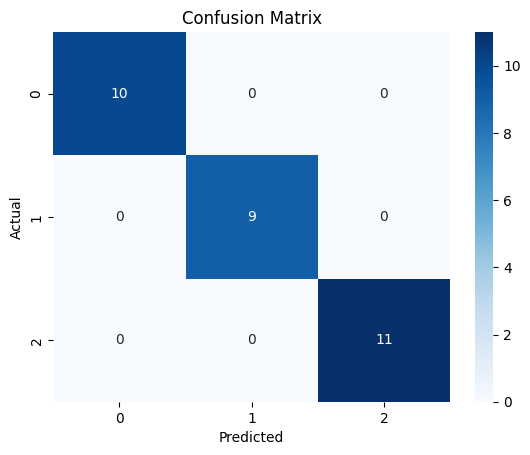

In [27]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()